In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

df = pd.read_csv("tips.csv")


## Change sex, smoker, day and time from object value types to categorical
df.sex = pd.Categorical(df.sex)
df.smoker = pd.Categorical(df.smoker)
df.day = pd.Categorical(df.day, categories=['Thur', 'Fri','Sat', 'Sun'], ordered=True)
df.time = pd.Categorical(df.time, categories=['Lunch', 'Dinner'], ordered=True)


##Check that changes have been applied
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [58]:
## Add bill_before_tip, bill_pp and tip% columns  for so a better analysis can be performed

df = df.assign(
    bill_before_tip = lambda x: x.total_bill - x.tip,
    tip_pct = lambda x: x.tip / x.bill_before_tip * 100,
    bill_pp = lambda x: x.bill_before_tip / x['size'],
    tip_pp = lambda x: x.tip / x['size'],
)

## Drop total_bill as its no longer needed
df=df.drop(columns = "total_bill")


display(df.info())
display(df.head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   tip              244 non-null    float64 
 1   sex              244 non-null    category
 2   smoker           244 non-null    category
 3   day              244 non-null    category
 4   time             244 non-null    category
 5   size             244 non-null    int64   
 6   bill_before_tip  244 non-null    float64 
 7   tip_pct          244 non-null    float64 
 8   bill_pp          244 non-null    float64 
 9   tip_pp           244 non-null    float64 
dtypes: category(4), float64(5), int64(1)
memory usage: 13.1 KB


None

,tip,sex,smoker,day,time,size,bill_before_tip,tip_pct,bill_pp,tip_pp
0,1.01,Female,No,Sun,Dinner,2,15.98,6.320401,7.990000,0.505000
1,1.66,Male,No,Sun,Dinner,3,8.68,19.124424,2.893333,0.553333
2,3.50,Male,No,Sun,Dinner,3,17.51,19.988578,5.836667,1.166667
3,3.31,Male,No,Sun,Dinner,2,20.37,16.249386,10.185000,1.655000
4,3.61,Female,No,Sun,Dinner,4,20.98,17.206864,5.245000,0.902500
5,4.71,Male,No,Sun,Dinner,4,20.58,22.886297,5.145000,1.177500
6,2.00,Male,No,Sun,Dinner,2,6.77,29.542097,3.385000,1.000000
7,3.12,Male,No,Sun,Dinner,4,23.76,13.131313,5.940000,0.780000
8,1.96,Male,No,Sun,Dinner,2,13.08,14.984709,6.540000,0.980000
9,3.23,Male,No,Sun,Dinner,2,11.55,27.965368,5.775000,1.615000


In [59]:
## Check if there are any NA values 
df.isnull().sum()


## No null values so the cleanup is finshed

tip                0
sex                0
smoker             0
day                0
time               0
size               0
bill_before_tip    0
tip_pct            0
bill_pp            0
tip_pp             0
dtype: int64

,tip,sex,smoker,day,time,size,bill_before_tip,tip_pct,bill_pp,tip_pp
178,4.00,Female,Yes,Sun,Dinner,2,5.60,71.428571,2.800000,2.000000
67,1.00,Female,Yes,Sat,Dinner,1,2.07,48.309179,2.070000,1.000000
232,3.39,Male,No,Sat,Dinner,2,8.22,41.240876,4.110000,1.695000
183,6.50,Male,Yes,Sun,Dinner,4,16.67,38.992202,4.167500,1.625000
109,4.00,Female,Yes,Sat,Dinner,2,10.31,38.797284,5.155000,2.000000
...,...,...,...,...,...,...,...,...,...,...
187,2.00,Male,Yes,Sun,Dinner,5,28.46,7.027407,5.692000,0.400000
0,1.01,Female,No,Sun,Dinner,2,15.98,6.320401,7.990000,0.505000
57,1.50,Female,No,Sat,Dinner,2,24.91,6.021678,12.455000,0.750000
102,2.50,Female,Yes,Sat,Dinner,3,41.80,5.980861,13.933333,0.833333


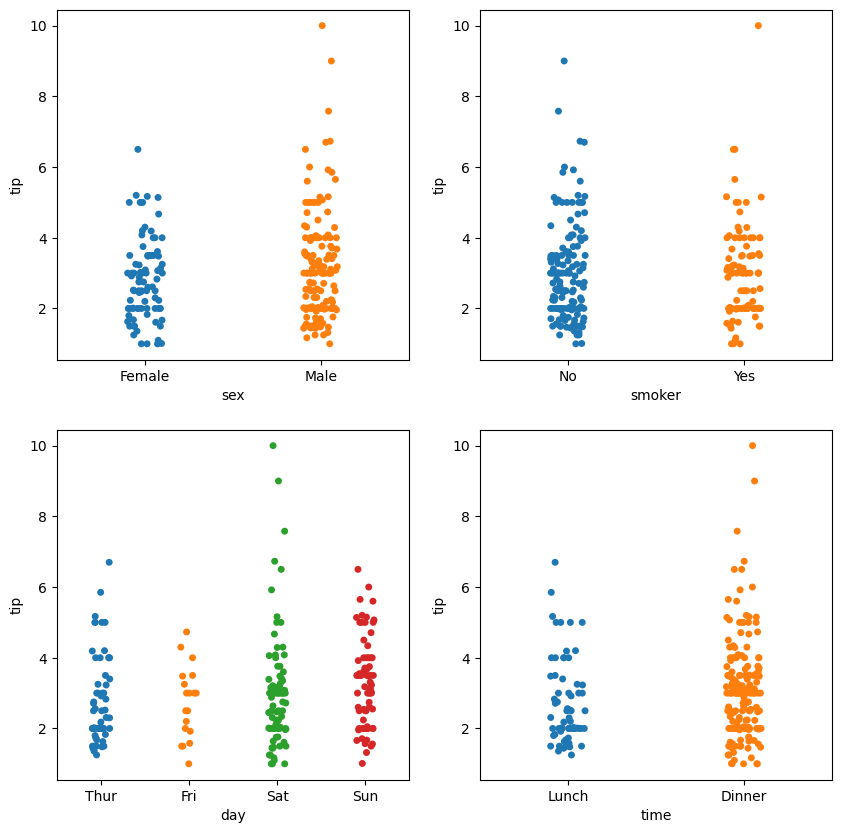

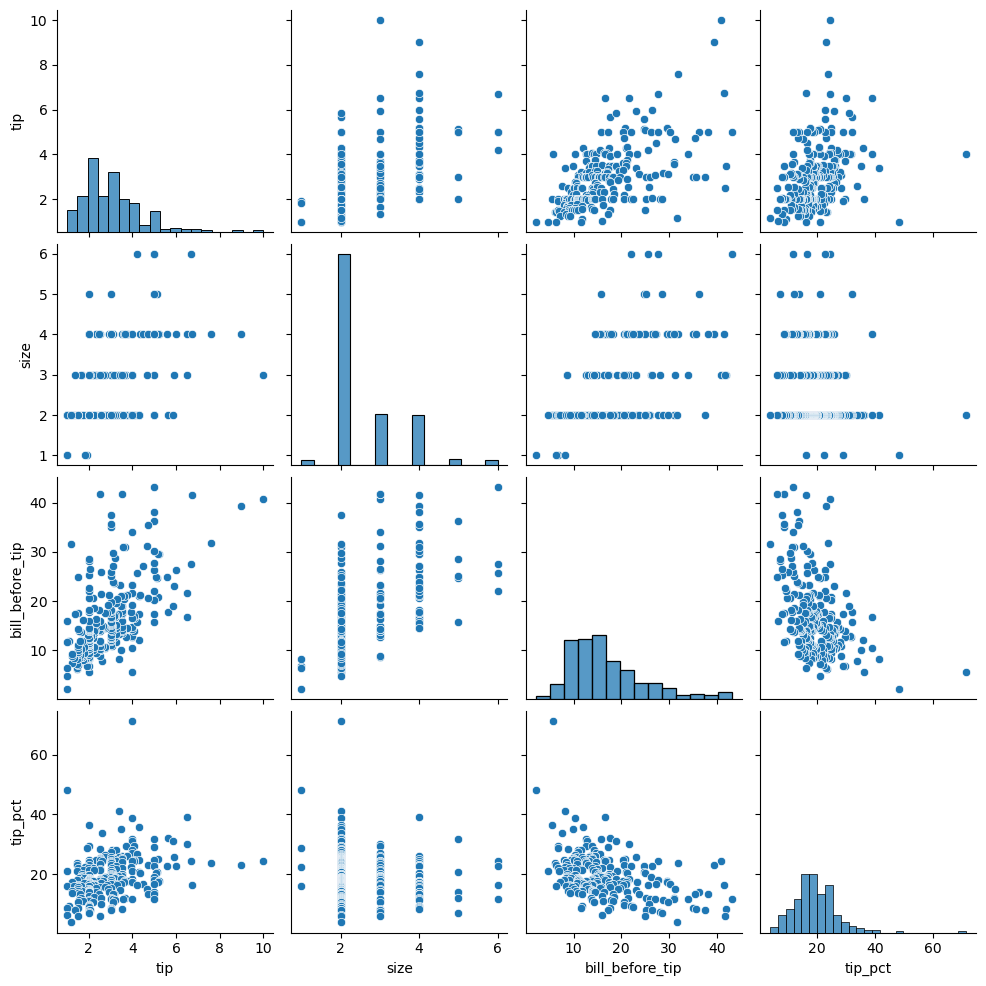

In [62]:
## identify if any of the categorical features have a corelation with our target tip

## Check Categorcical 
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.stripplot(ax=axes[0,0], x=df.sex , y=df.tip )
sns.stripplot(ax=axes[0,1], x=df.smoker , y=df.tip )
sns.stripplot(ax=axes[1,0], x=df.day , y=df.tip )
sns.stripplot(ax=axes[1,1], x=df.time , y=df.tip )

## From the striplots below we can tell that 
## There are more male customers and male customers tip better - potentail corelation
## There are more non smokers however it doesnt have an effect on the tip
## The days are the busiest in the following order Saturday > Sunday > Thursday > Friday , best tips are achieved on a saturday and the worst on a friday -potential corelation
## There are more customers at dinner time and the tips seem to be higher during dinner - potential coreleation


## Check Numerical and remove one tips outlier to get a better idea of the tip distribution 
tips_no_outlier  = df.sort_values(["tip_pct"] , ascending=False )
tips_no_outlier.drop(index=tips_no_outlier.index[0], axis=0, inplace=True)
display(tips_no_outlier)

sns.pairplot(tips_no_outlier , vars=["tip" , "size" , "bill_before_tip", "tip_pct"])

## Here are some possible corelations that we can see from the  pairplot
## the tip amount increase as the group size increases  - min and max tip values on pairplot increase each time the group size increases
## smaller group sizes tend to have a higher median tip percentage  - standard deviation and data distribution on the pairplot increases as gruop gets ssmaller
## the tip percetage is higher when the bill is lower -  you can see that data is clustered on the left side of the plot and as the bill decreases date distribution moves out further right 
## bills are higher for bigger groups - min ,  max and median values increase as group


,tip,size,bill_before_tip,tip_pct,bill_pp,tip_pp
tip,1.000000,0.468268,0.593692,0.396186,0.318711,0.695654
size,0.468268,1.000000,0.594742,-0.152211,-0.144918,-0.262061
bill_before_tip,0.593692,0.594742,1.000000,-0.427085,0.670002,0.185585
tip_pct,0.396186,-0.152211,-0.427085,1.000000,-0.380125,0.548320
bill_pp,0.318711,-0.144918,0.670002,-0.380125,1.000000,0.490681
tip_pp,0.695654,-0.262061,0.185585,0.548320,0.490681,1.000000


,tip,size,bill_before_tip,tip_pct,bill_pp,tip_pp
tip,1.000000,0.489299,0.576663,0.241572,0.253268,0.677494
size,0.489299,1.000000,0.578831,-0.102808,-0.144104,-0.253618
bill_before_tip,0.576663,0.578831,1.000000,-0.302144,0.687165,0.150386
tip_pct,0.241572,-0.102808,-0.302144,1.000000,-0.312787,0.390978
bill_pp,0.253268,-0.144104,0.687165,-0.312787,1.000000,0.401059
tip_pp,0.677494,-0.253618,0.150386,0.390978,0.401059,1.000000


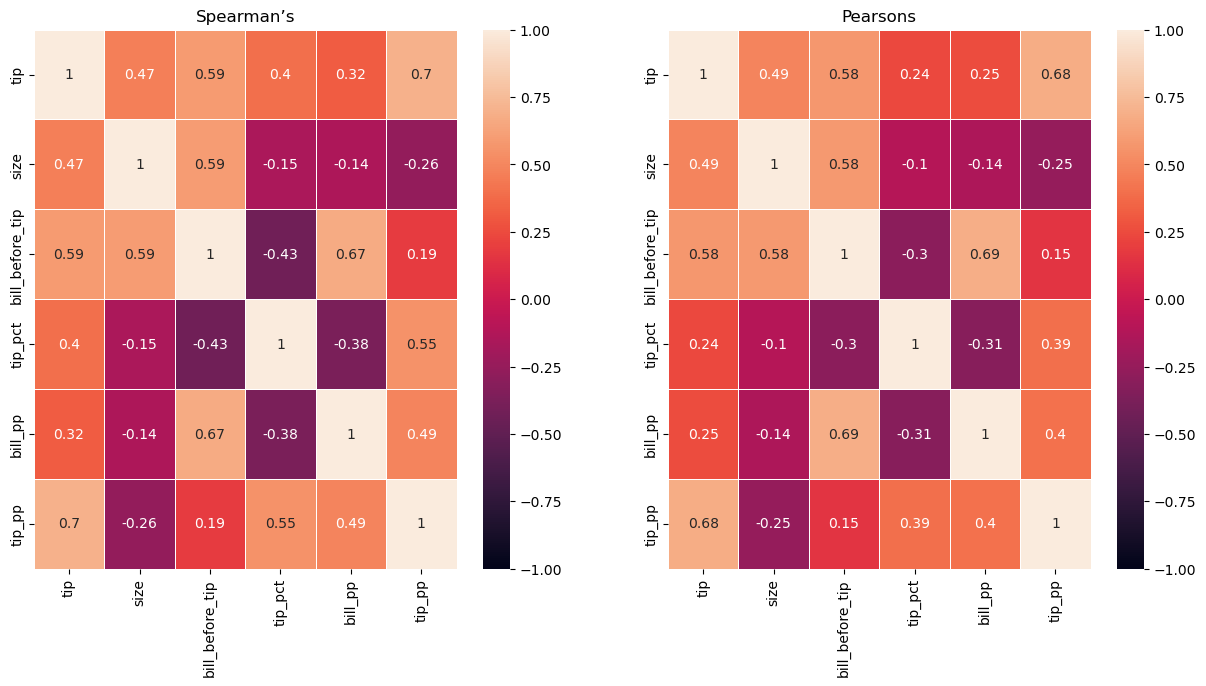

In [94]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 7))

## Using Spearman’s Rank Coefficient to further identify possible corelations
columns = df.columns
SpearCorr = df[columns].corr(method='spearman')

ax1.set_title("Spearman’s")
sns.heatmap( SpearCorr, annot=True, vmin=-1 , vmax=1 , linewidths=0.5 , ax=ax1)


display(SpearCorr)


## From the heatmap of Spearmans coefficient we can see the following have the most notable  relations 
## tip - tip_pp - excluded as tip pp obviosule depends on the tip
## tip - bill_before_tip - 0.59
## size - bill_before_tip - 0.59
## tip_pct - bill_before_tip - 0.43
## bill_pp - tip_pct - excluded as this is similar to bill_before_tip and tip_pct

## The two most suprising corelations here are the tip and bill and tip percentage and bill, we will look into this further


## Using Pearson’s Correlation Coefficient to Identify any corelations that might have been missed in Spearmans
PearsonCorr = df[columns].corr()

ax2.set_title("Pearsons")
sns.heatmap(PearsonCorr, annot=True, vmin=-1 , vmax=1 , linewidths=0.5 , ax=ax2)
display(PearsonCorr)


## From  Pearsons corelation heatmap we can see  that the following have a high level of coreleation once again 
## tip - bill_before_tip - 0.58 (overlaps with with weaker relation tip_pct - bill_before_tip - 0.3)
## size - bill_before_tip - 0.58
 

## What is interesting here is that Pearsons heatmap shows a higher corelation between tip_pct - bill_pp than tip_pct-bill_before_tip where Spearmans heatmap shows the oppsoite




interval columns not set, guessing: ['tip', 'size', 'bill_before_tip', 'tip_pct', 'bill_pp', 'tip_pp']


,tip,sex,smoker,day,time,size,bill_before_tip,tip_pct,bill_pp,tip_pp
tip,1.000000,0.000000,0.000000,0.000000,0.053678,0.430985,0.742296,0.273954,0.363611,0.941350
sex,0.000000,1.000000,0.000000,0.309001,0.286979,0.082603,0.104836,0.000000,0.000000,0.000000
smoker,0.000000,0.000000,1.000000,0.455862,0.000000,0.073305,0.170766,0.115066,0.349089,0.047328
day,0.000000,0.309001,0.455862,1.000000,0.995930,0.219379,0.000000,0.128833,0.000000,0.000000
time,0.053678,0.286979,0.000000,0.995930,1.000000,0.294770,0.242387,0.000000,0.000000,0.142475
size,0.430985,0.082603,0.073305,0.219379,0.294770,1.000000,0.479183,0.000000,0.000000,0.176881
bill_before_tip,0.742296,0.104836,0.170766,0.000000,0.242387,0.479183,1.000000,0.478113,0.909246,0.459139
tip_pct,0.273954,0.000000,0.115066,0.128833,0.000000,0.000000,0.478113,1.000000,0.524031,0.569141
bill_pp,0.363611,0.000000,0.349089,0.000000,0.000000,0.000000,0.909246,0.524031,1.000000,0.571909
tip_pp,0.941350,0.000000,0.047328,0.000000,0.142475,0.176881,0.459139,0.569141,0.571909,1.000000


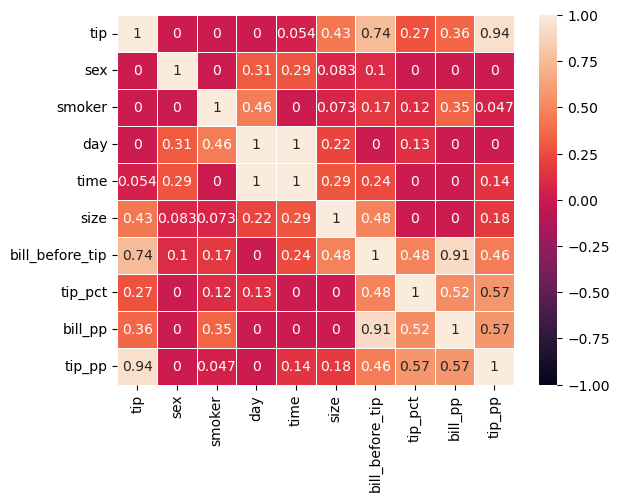

In [98]:
## Using Phiks corelation coefficient to identify categorical relations

import phik
columns = df.columns
PhikCorr = df[columns].phik_matrix()

sns.heatmap(PhikCorr, annot=True, vmin=-1 , vmax=1,  linewidths=0.5)


PhikCorr

## Phiks heatmap doesnt point to any strong relationships between the tip amount and any categorical features
## We can see that there is a possible relationship between day - sex and day - smoker , we will look inot these a bit more 

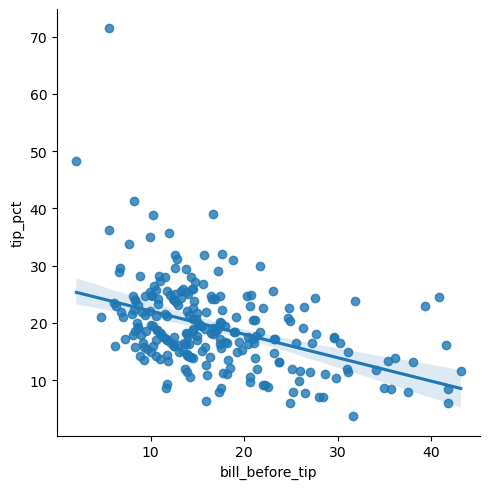

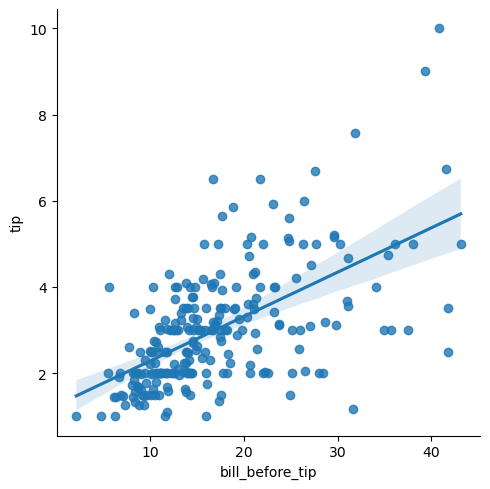

In [130]:
## Further look into tip - bill_before_tip and tip_pct - bill_before_tip

## Using tips no outlier to get a better look at plots
sns.lmplot(x="bill_before_tip", y="tip_pct", data=tips_no_outlier);
sns.lmplot(x="bill_before_tip", y="tip", data=tips_no_outlier);


## Removing the outlier allowed us to have a better look at the relations between bill_before_tip - tip & tip_pct
##  from the first lmplot we can see that although it is a  weak  negative relation (almost horizontal regression line) one could come make the assumption that lower bills tend to come with a better tipping percentage 
## however there is a stronger  positive relation (regression line with a bigger angle to the x axis) between the tip and total bill as we can be more confident in saying that higher bills come with higher tips

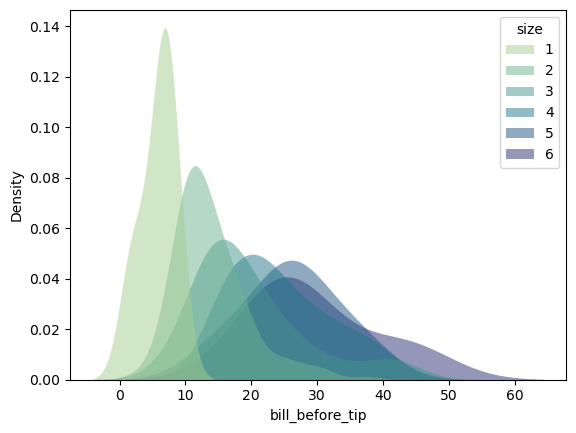

<AxesSubplot:xlabel='size', ylabel='bill_before_tip'>

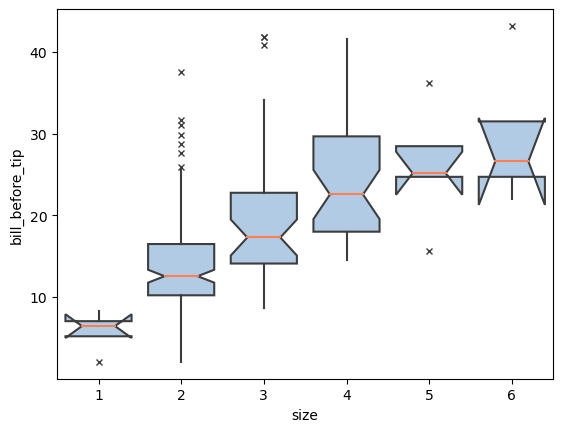

In [140]:
## Further look into size - bill_before_tip

sns.kdeplot(data=df, x="bill_before_tip", hue="size",fill=True, common_norm=False, palette="crest",alpha=.5, linewidth=0,)
plt.show()

sns.boxplot(
    data=df, x="size", y="bill_before_tip",
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
)

## The kdeplot shows us that the data distibution relative to each group size becomes more widespread as the group size increaases  , this will make it harder to distinguish a direct relationship between the groups and bill
## Using a boxplot we can distinguish the median bill of each group and clearly see that it gradually increases as the groups get bigger ,
## Looking at the interquartile range of each group we can tell that groups 1 ,5 and 6 have a small set of data and its bill values seem pretty concise however groups of 2,3,4 have larger sets of data and its more distributed
## Looking at the graphs we can conclude that there is in face a strong relation between the group size and bill_before_tip

<AxesSubplot:xlabel='day', ylabel='count'>

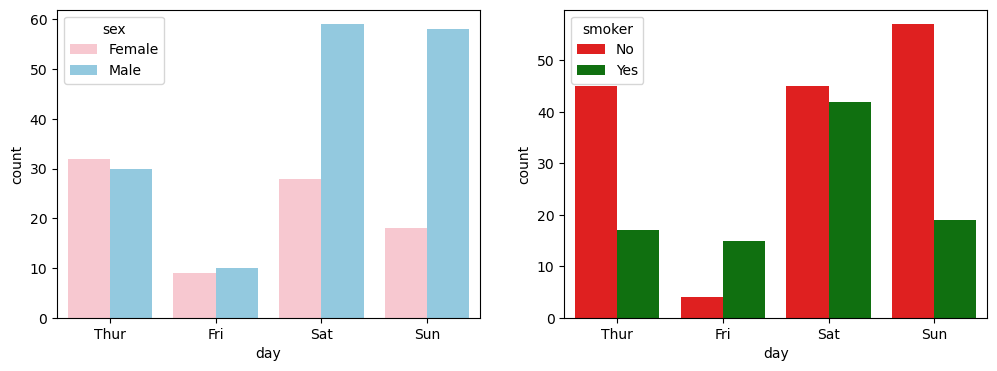

In [158]:
## Further look into day - sex and day - smoker
f, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x ="day", hue="sex",data =df, ax=axes[0] , palette=['pink',"skyblue"])
sns.countplot(x ="day", hue="smoker",data =df, ax=axes[1] , palette=["red","green"])







## We can clearly see the relationship between sex and day on the countplot below. Thursday and friday the sex of the customer is balanced while on weekend days (saturday and sunday) the men customer count doubles and trbeles that of the females.
## The relationship between smokers and days isnt as clear however we can see that the count of smokers increases on firdays and saturdays and remai

